# MODELO DE PREDICCIÓN DE FUGA DE CLIENTES

## OBJETIVO

El presente proyecto tiene como objetivo realizar modelos para predecir la fuga de clientes en la empresa TelecomX. Para esto, se utilizarán modelos de Machine Learning y se compararán las métricas obtenidas para elegir el mejor modelo que pueda predecir la fuga de clientes.

## IMPORTACIÓN DE LIBRERÍAS Y DATOS

In [24]:
# Importación de librerías

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [25]:
# Importación de datos

datos = pd.read_csv('dataframe_telecom1.csv')
datos.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,cust_tenure_int,phone_service,phone_multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,6-10,1,No,1,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,6-10,1,Yes,1,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,0-5,1,No,1,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,11-15,1,No,1,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,0-5,1,No,1,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


El diccionario del dataframe final es el siguiente:
- 'churn': si el cliente dejó o no la empresa. Sí = 1 y No = 0.
- 'cust_gender': género del cliente. Masculino = 1 y Femenino = 0.
- 'cust_senior_citizen': información sobre si un cliente tiene o no una edad igual o mayor a 65 años. Sí = 1 y No = 0.
- 'cust_partner': si el cliente tiene o no una pareja. Sí = 1 y No = 0.
- 'cust_dependents': si el cliente tiene o no dependientes. Sí = 1 y No = 0.
- 'cust_tenure': meses de contrato del cliente.
- 'cust_tenure_int': intervalo de antiguedad en meses a la que pertenece el valor de 'cust_tenure'
- 'phone_service': suscripción al servicio telefónico. Sí = 1 y No = 0.
- 'phone_multiple_lines': suscripción a más de una línea telefónica.
- 'internet_service': suscripción al servicio de internet. Sí = 1 y No = 0.
- 'internet_type': tipo de servicio de internet contratado.
- 'online_security': suscripción adicional de seguridad en línea.
- 'online_backup': suscripción adicional de respaldo en línea.
- 'device_protection': suscripción adicional de protección del dispositivo.
- 'tech_support': suscripción adicional de soporte técnico, menor tiempo de espera.
- 'streaming_tv': suscripción de televisión por cable.
- 'streaming_movies': suscripción de streaming de películas.
- 'contract_type': tipo de contrato.
- 'paperless_billing': si el cliente prefiere recibir la factura en línea.  Sí = 1 y No = 0.
- 'payment_method': forma de pago.
- 'monthly_charges': total de todos los servicios del cliente por mes.
- 'total_charges': total gastado por el cliente.
- 'daily_charges': total de todos los servicios del cliente por día.

## ANÁLISIS EXPLORATORIO DE LOS DATOS

Se realizará un análisis exploratorio del dataframe importado para poder verificar:
- Qué columnas del dataframe no aportan información para el modelo.
- Qué transformaciones son necesarias realizar a las variables explicativas.

In [26]:
# Metadatos del dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7043 non-null   int64  
 1   cust_gender           7043 non-null   int64  
 2   cust_senior_citizen   7043 non-null   int64  
 3   cust_partner          7043 non-null   int64  
 4   cust_dependents       7043 non-null   int64  
 5   cust_tenure           7043 non-null   int64  
 6   cust_tenure_int       7043 non-null   object 
 7   phone_service         7043 non-null   int64  
 8   phone_multiple_lines  7043 non-null   object 
 9   internet_service      7043 non-null   int64  
 10  internet_type         7043 non-null   object 
 11  online_security       7043 non-null   object 
 12  online_backup         7043 non-null   object 
 13  device_protection     7043 non-null   object 
 14  tech_support          7043 non-null   object 
 15  streaming_tv         

In [27]:
# Verificación de datos por columna

for x in datos.columns:
    num_valores_unicos = datos[x].nunique()
    print(f'La columna {x} tiene {num_valores_unicos} valores únicos')
    if num_valores_unicos < 5:
        print(datos[x].unique())
    print('----\n')

La columna churn tiene 2 valores únicos
[0 1]
----

La columna cust_gender tiene 2 valores únicos
[0 1]
----

La columna cust_senior_citizen tiene 2 valores únicos
[0 1]
----

La columna cust_partner tiene 2 valores únicos
[1 0]
----

La columna cust_dependents tiene 2 valores únicos
[1 0]
----

La columna cust_tenure tiene 73 valores únicos
----

La columna cust_tenure_int tiene 14 valores únicos
----

La columna phone_service tiene 2 valores únicos
[1 0]
----

La columna phone_multiple_lines tiene 3 valores únicos
['No' 'Yes' 'No phone service']
----

La columna internet_service tiene 2 valores únicos
[1 0]
----

La columna internet_type tiene 3 valores únicos
['DSL' 'Fiber optic' 'No internet service']
----

La columna online_security tiene 3 valores únicos
['No' 'Yes' 'No internet service']
----

La columna online_backup tiene 3 valores únicos
['Yes' 'No' 'No internet service']
----

La columna device_protection tiene 3 valores únicos
['No' 'Yes' 'No internet service']
----

La col

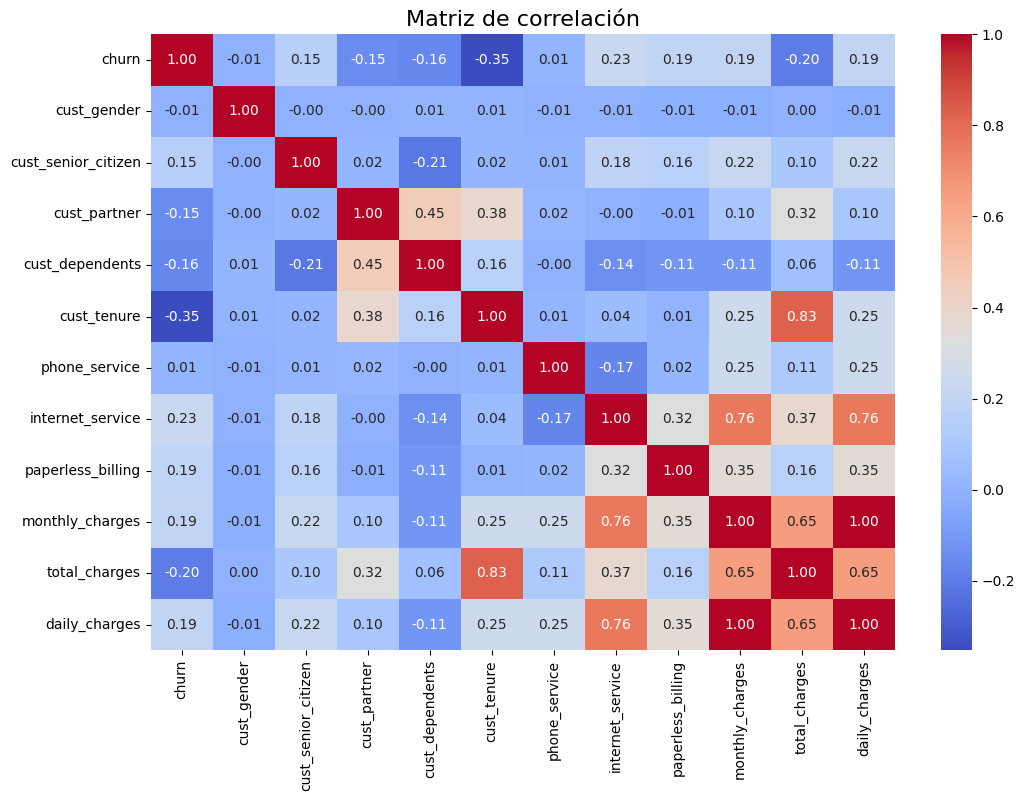

In [29]:
# Matriz de correlación

corr = datos.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación", fontsize=16)
plt.show()

1. El Dataframe importado tiene 23 columnas y 7043 filas.
2. De acuerdo a los datos del dataframe importado, se deben realizar las siguientes acciones:

- Eliminar la columna 'cust_tenure_int', por ser de tipo object y tener información redundante con la columna 'cust_tenure'.
- Eliminar la columna 'internet_type', por ser redundante con la columna 'internet_service'.
- Eliminar la columna 'daily_charges', pues tiene información redundate con 'monthly_charges'.
- Eliminar la columna 'total_charges', pues tiene información redundante con 'monthly_charges' y 'cust_tenure'.
- Las columnas 'phone_multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv' y 'streaming_movies' tienen 3 valores que pueden ser reducirdos a 2 valores (Yes y No).
- Se debe realizar una codificación one-hot a las siguientes columnas: 'phone_multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'payment_method'.

In [30]:
# Eliminación de las columnas 'cust_tenure_int', 'internet_type', 'daily_charges' y 'total_charges'

datos_final = datos.drop(columns=['cust_tenure_int', 'internet_type', 'daily_charges', 'total_charges'])
datos_final.sample()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges
754,0,0,0,1,1,55,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),19.4


In [31]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7043 non-null   int64  
 1   cust_gender           7043 non-null   int64  
 2   cust_senior_citizen   7043 non-null   int64  
 3   cust_partner          7043 non-null   int64  
 4   cust_dependents       7043 non-null   int64  
 5   cust_tenure           7043 non-null   int64  
 6   phone_service         7043 non-null   int64  
 7   phone_multiple_lines  7043 non-null   object 
 8   internet_service      7043 non-null   int64  
 9   online_security       7043 non-null   object 
 10  online_backup         7043 non-null   object 
 11  device_protection     7043 non-null   object 
 12  tech_support          7043 non-null   object 
 13  streaming_tv          7043 non-null   object 
 14  streaming_movies      7043 non-null   object 
 15  contract_type        

El dataframe final tiene 19 columnas y 7043 filas.

## PROCESAMIENTO DE DATOS

In [7]:
# Separación en target y variables (features)

X = datos_final.drop(columns=['churn'])
y = datos_final['churn']

In [8]:
# Separación en datos de prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Identificar columnas categóricas y numéricas

col_categoricas = X_train.select_dtypes(include="object").columns.tolist()
col_numericas = X_train.select_dtypes(exclude="object").columns.tolist()

In [32]:
# Función para binarizar columnas 'phone_multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv' y 'streaming_movies'

def binarizar_columnas(df):
    columnas_a_modificar = [
        'phone_multiple_lines', 'online_security', 'online_backup', 'device_protection', 
        'tech_support', 'streaming_tv', 'streaming_movies'
    ]
    for col in columnas_a_modificar:
        if col in df.columns:
            df[col] = df[col].where(df[col].isin(['Yes']), 'No')
    return df

In [33]:
# Transformación de datos categóricos y numéricos

transformador_num = Pipeline(steps=[
    ("scaler", StandardScaler())
])

trnasformador_cat = Pipeline(steps=[
    ("binarizar", FunctionTransformer(binarizar_columnas)),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


In [34]:
# Preprocesamiento: One-hot encoding y escalamiento

preprocesador = ColumnTransformer(
    transformers=[
        ("num", transformador_num, col_numericas),
        ("cat", trnasformador_cat, col_categoricas)
    ]
)